In [112]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Preprocess the data

In [150]:


data = pd.read_csv("./datasets/Train_titanic.csv")
data.head(n=10)
column_drop=["name", "home.dest","boat","body", "embarked","cabin", "ticket"]

data_train=data.drop(axis=1,
    columns=column_drop)

dataT= pd.read_csv("./datasets/Test_titanic.csv")
data_test= dataT.drop(axis=1, columns= column_drop)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
pclass       1009 non-null float64
survived     1009 non-null float64
name         1009 non-null object
sex          1009 non-null object
age          812 non-null float64
sibsp        1009 non-null float64
parch        1009 non-null float64
ticket       1009 non-null object
fare         1008 non-null float64
cabin        229 non-null object
embarked     1008 non-null object
boat         374 non-null object
body         98 non-null float64
home.dest    582 non-null object
dtypes: float64(7), object(7)
memory usage: 110.4+ KB


In [151]:
le = LabelEncoder()

data_train["sex"] = le.fit_transform(data_train["sex"])
data_test["sex"]= le.fit_transform(data_test["sex"])
data_test.head(n=10)


,pclass,sex,age,sibsp,parch,fare
0,1.0,1,36.0,0.0,0.0,26.3875
1,3.0,0,NaN,8.0,2.0,69.5500
2,1.0,1,NaN,0.0,0.0,50.0000
3,2.0,1,34.0,0.0,0.0,13.0000
4,2.0,1,28.0,0.0,0.0,13.0000
5,2.0,0,31.0,1.0,1.0,26.2500
6,1.0,1,40.0,0.0,0.0,27.7208
7,3.0,1,NaN,0.0,0.0,7.2292
8,3.0,1,22.0,0.0,0.0,8.0500
9,1.0,1,30.0,0.0,0.0,45.5000


In [152]:

data_train["age"]=data_train.fillna(data_train["age"].mean())["age"]
data_train["fare"]=data_train.fillna(data_train["fare"].mean())["fare"]
#data_train["body"]=data_train.fillna(data_train["body"].mean())["body"]
data_train.info()
data_test["age"]=data_test.fillna(data_test["age"].mean())["age"]
#data_test["body"]=data_test.fillna(data_test["body"].mean())["body"]
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
pclass      1009 non-null float64
survived    1009 non-null float64
sex         1009 non-null int32
age         1009 non-null float64
sibsp       1009 non-null float64
parch       1009 non-null float64
fare        1009 non-null float64
dtypes: float64(6), int32(1)
memory usage: 51.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
pclass    300 non-null float64
sex       300 non-null int32
age       300 non-null float64
sibsp     300 non-null float64
parch     300 non-null float64
fare      300 non-null float64
dtypes: float64(5), int32(1)
memory usage: 13.0 KB


# Make and train your tree

In [153]:
sk_tree= DecisionTreeClassifier(criterion='entropy',max_depth=4)
input_col=["pclass", "sex", "age", "sibsp", "parch", "fare"]
output_col=["survived"]

sk_tree.fit(data_train[input_col], data_train[output_col])

y= sk_tree.predict(data_test[input_col])
print(y.shape)


(300,)


In [154]:
y= pd.DataFrame(y )
y.head(n=10)
a = pd.read_csv("./datasets/sample_submission.csv")
#y.columns= a.columns
y.columns=['survived']
y.to_csv("./datasets/result_titanic.csv",
    header=True,
    index=True,
    index_label="Id",)





# Make prediction using random forest

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
Xtrain= data_train[input_col]
Ytrain= np.array(data_train[output_col]).reshape((-1,))
Xtest= data_test[input_col]
#Ytest= np.array(data_test[output_col]).reshape((-1,))


In [217]:
acc_list = []
for i in range(30):
    acc= cross_val_score(RandomForestClassifier(n_estimators= i+1, max_depth=9,criterion= 'entropy'), Xtrain, Ytrain, cv=5).mean() 
    acc_list.append(acc)
print(acc_list)

[0.7630321299904418, 0.780971987353871, 0.7809915937553612, 0.7779575031247703, 0.7790113472048624, 0.7868833174031321, 0.7818983898242775, 0.7849030708526333, 0.7859078989290003, 0.7977109526260324, 0.7918780481827317, 0.804764355562091, 0.7928632698576085, 0.7959071636889444, 0.8047447491606009, 0.7908634169056197, 0.8086954390608534, 0.8017694777344804, 0.8027939122123374, 0.7929024826605886, 0.7938779011347205, 0.7987844031076146, 0.8087444550645786, 0.8037791338872143, 0.8008528784648188, 0.7948435164081072, 0.7998578535891969, 0.7988432223120848, 0.7988040095091047, 0.8066857829081195]


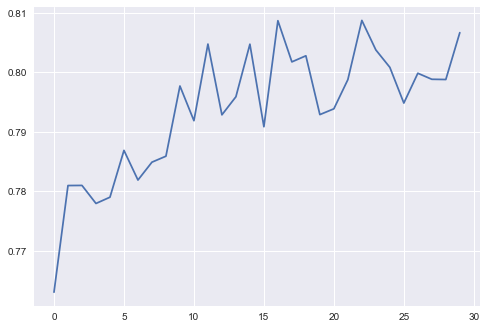

22
0.8087444550645786


In [218]:
plt.plot(acc_list)
plt.style.use("seaborn")
plt.show()
print(np.argmax(acc_list))
print(acc_list[np.argmax(acc_list)])

In [219]:
rf = RandomForestClassifier(n_estimators=15, criterion='entropy', max_depth= 9)
rf.fit(Xtrain, Ytrain)

y= rf.predict(Xtest)
print(y.shape)

(300,)


In [220]:
y= pd.DataFrame(y )

a = pd.read_csv("./datasets/sample_submission.csv")
#y.columns= a.columns
y.columns=['survived']
y.to_csv("./datasets/result_titanic.csv",
    header=True,
    index=True,
    index_label="Id",)

